In [460]:
import pandas as pd

In [461]:
df = pd.read_csv('dates.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%y')

In [462]:
df = df.dropna()

In [463]:
df['monthyear'] = df['date'].apply(lambda x: "%d/%d" % (x.month, x.year))
df = df.sort_values(by = ['date'])
df

,id,date,monthyear
233,705035735,2002-01-25,1/2002
56,731063195,2006-03-06,3/2006
116,763260610,2010-04-15,4/2010
65,111111112,2013-06-26,6/2013
126,708487008,2014-01-29,1/2014
...,...,...,...
262,702111021,2019-10-30,10/2019
286,730389374,2019-10-30,10/2019
62,723537899,2019-10-30,10/2019
222,700461600,2019-10-30,10/2019


In [464]:
df = df.groupby(['monthyear']).size().reset_index()
df['date'] = pd.to_datetime(df['monthyear'], format='%m/%Y')
df = df.sort_values(by = ['date'])
df.dropna()
df = df[df[0] != 1]
df

,monthyear,0,date
8,11/2016,2,2016-11-01
14,2/2017,2,2017-02-01
5,10/2017,29,2017-10-01
9,11/2017,19,2017-11-01
11,12/2017,10,2017-12-01
3,1/2018,18,2018-01-01
15,2/2018,49,2018-02-01
20,3/2018,14,2018-03-01
25,5/2018,28,2018-05-01
28,6/2018,24,2018-06-01


In [465]:
df.columns = ['monthyear', 'articleCount', 'date']
df = df.drop(columns=['date'])
df

,monthyear,articleCount
8,11/2016,2
14,2/2017,2
5,10/2017,29
9,11/2017,19
11,12/2017,10
3,1/2018,18
15,2/2018,49
20,3/2018,14
25,5/2018,28
28,6/2018,24


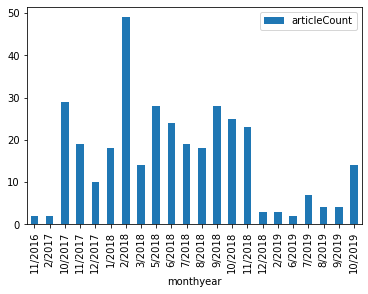

In [466]:
plot = df.plot.bar(x='monthyear', y='articleCount')

In [467]:
plot.get_figure().savefig('plot.png', dpi=200, bbox_inches = "tight")